In [66]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [67]:
raw_data = pd.read_csv('./Market_Basket_Optimisation.csv', header=None)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
0     7501 non-null object
1     5747 non-null object
2     4389 non-null object
3     3345 non-null object
4     2529 non-null object
5     1864 non-null object
6     1369 non-null object
7     981 non-null object
8     654 non-null object
9     395 non-null object
10    256 non-null object
11    154 non-null object
12    87 non-null object
13    47 non-null object
14    25 non-null object
15    8 non-null object
16    4 non-null object
17    4 non-null object
18    3 non-null object
19    1 non-null object
dtypes: object(20)
memory usage: 1.1+ MB


In [68]:
raw_data.insert(0, 'Transaction', range(1, 7502))
raw_data = raw_data.fillna(value='none',axis=1)
data = pd.DataFrame(columns=['Transaction', 'Items'])

In [70]:
index = 0
for i in range(len(raw_data['Transaction'])):
    for j in range(0,20):
        if raw_data[j][i] != 'none':
            raw_data[j][i] = raw_data[j][i].strip()
            data.loc[index] = [i+1, raw_data[j][i]]
            index += 1            

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
data.drop_duplicates(inplace=True)

In [78]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

pd.options.display.max_columns=100
hot_encoded_df=data.groupby(['Transaction','Items'])['Items'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_df = hot_encoded_df.applymap(encode_units)
frequent_itemsets = apriori(hot_encoded_df, min_support=0.05, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
print('-'*20, '频繁项集', '-'*20)
print(frequent_itemsets)

-------------------- 频繁项集 --------------------
     support                    itemsets
16  0.238368             (mineral water)
6   0.179709                      (eggs)
21  0.174110                 (spaghetti)
8   0.170911              (french fries)
3   0.163845                 (chocolate)
12  0.132116                 (green tea)
15  0.129583                      (milk)
13  0.098254               (ground beef)
10  0.095321         (frozen vegetables)
18  0.095054                  (pancakes)
0   0.087188                   (burgers)
1   0.081056                      (cake)
4   0.080389                   (cookies)
7   0.079323                  (escalope)
14  0.076523            (low fat yogurt)
19  0.071457                    (shrimp)
22  0.068391                  (tomatoes)
17  0.065858                 (olive oil)
9   0.063325           (frozen smoothie)
23  0.062525                    (turkey)
2   0.059992                   (chicken)
27  0.059725  (spaghetti, mineral water)
24  0.0585

In [79]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)
print('-'*20, '关联规则', '-'*20)
print(rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.2) ])

-------------------- 关联规则 --------------------
       antecedents      consequents  antecedent support  consequent support  \
0      (spaghetti)  (mineral water)            0.174110            0.238368   
1  (mineral water)      (spaghetti)            0.238368            0.174110   
2      (chocolate)  (mineral water)            0.163845            0.238368   
3  (mineral water)      (chocolate)            0.238368            0.163845   
4           (eggs)  (mineral water)            0.179709            0.238368   
5  (mineral water)           (eggs)            0.238368            0.179709   

    support  confidence      lift  leverage  conviction  
0  0.059725    0.343032  1.439085  0.018223    1.159314  
1  0.059725    0.250559  1.439085  0.018223    1.102008  
2  0.052660    0.321400  1.348332  0.013604    1.122357  
3  0.052660    0.220917  1.348332  0.013604    1.073256  
4  0.050927    0.283383  1.188845  0.008090    1.062815  
5  0.050927    0.213647  1.188845  0.008090    1.04

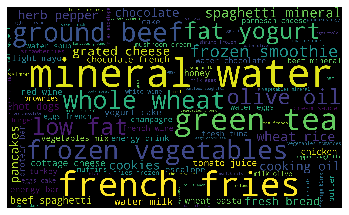

In [74]:
#Word_Cloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

Transaction = " ".join(str(data['Transaction']))
Items = " ".join(data['Items'])
all_word = Transaction + Items

cut_text = word_tokenize(all_word)
cut_text = " ".join(cut_text)
wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,
    )
wordcloud = wc.generate(cut_text)
# 写词云图片
wordcloud.to_file("wordcloud.jpg")
# 显示词云文件
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
